# **Business Problem**
**In recent years, City Hotel and Resort Hotel have seen high cancellation rates. Each hotel is now dealing with a number of issues as a result, including fewer revenues and less than ideal hotel room use. Consequently, lowering cancellation rates is both hotel's primary goal in order to increase their efficiency in generating revenue, and for us to offer thorough business advice to address this problem.**

**The analysis of hotel booking cancellations as well as other factors that have no bearing on their business and yearly revenue generation are the main topics of this report.**

# Assumptions


1. No unusual occurrences between 2015 and 2017 will have a substantial impact on the data used. (we assume that their is no outlier)
2. The information is still current and can be used to analyze a hotel's possible plans in an efficient manner.
3. The hotels are not currently using any of the suggested solutions.
4. The biggest factor affecting the effectiveness of earning income is booking cancellations.
5. Cancellations result in vacant rooms for the booked length of time.
6. Clients make hotel reservations the same year they make cancellations.



# Research Questions



1. What are the variables that affect hotel reservation cancellations ?
2. How can we make hotel reservation cancellations better ?
3. how will hotels be assisted in making pricing and promotional decisions ?



# Hypothesis

1. More cancellations occur when prices are higher.
2. When there is a longer waiting list, customers tend to cancel more frequently.
3. The majority of clients are coming from offline travel agents to make their reservations.

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')                                 # this will remove all warnings in our file when we do some warning code

## Load The Dataset

In [3]:
df = pd.read_csv('hotel_bookings 2.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


## Exploratory Data Analysis (EDA) and Data Cleaning

In [4]:
# 1) first we have to check how many rows and columns are in our data
df.shape

(119390, 32)

In [5]:
# check all columns name
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
# 2) checking the data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**NOTE :- when you see 0 and 1 in any columns that describe about the boolean values like 1 is for True and 0 is for False**

*3) so as we see reservation_status_date column is in object dtype but we want it in date dtype*

In [7]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%d/%m/%Y')      # it will change into date time
# we have also provide format of date
df['reservation_status_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 119390 entries, 0 to 119389
Series name: reservation_status_date
Non-Null Count   Dtype         
--------------   -----         
119390 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 932.9 KB


*4) check the summary of object type columns*

In [8]:
check1 = df.describe(include = 'object')               # it will only show the summary of object type column
check1

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [9]:
# now we use for loop where i can see only unique values in that particular object type column

for col in check1.columns:                      # Run a loop through all columns in check1
  print(col)                                    # print column name
  print(df[col].unique())                       # get all unique values from a specific column in a DataFrame (df)
  print('-'*60)                                 # Because of this line, the difference between one column and another column can be identified.

hotel
['Resort Hotel' 'City Hotel']
------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'C

*5) cheking the null values in our dataframe*

In [10]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

**As we can see, the 'company' column has too many null values—almost equal to the total number of rows. Since we can't effectively handle this, we need to remove this column from the DataFrame.**

**Similarly, the 'agent' column also has null values, though not as many. However, we should remove this column as well because it isn't useful for our analysis and EDA.**

In [11]:
# 6) drop unwanted columns
df.drop(columns= ['company', 'agent'], inplace = True)

**7) For columns like 'country' and 'children', there are very few null values compared to the lacs of rows in the dataset. Since these null values are minimal, we can simply drop the rows containing them instead of filling them. This won’t significantly impact our data, so we’ll use dropna() to remove these null rows.**

In [12]:
df.dropna(inplace = True)             # It removes the entire row if there is any null value in that row

In [13]:
# now check
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

*8) now see the statistical summary of numerical columns*

In [14]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


**As we can see in the statistical summary, many columns contain outliers—such as 'adr' (Average Daily Rate) and 'days_in_waiting_list', along with several other columns.**

**so we have to remove the full row which contain outliers**

*9) First, we will use boxplots to check how the outliers are distributed and then remove them based on their severity. We will focus only on columns where the outliers appear extremely extreme (highly deviated)."*

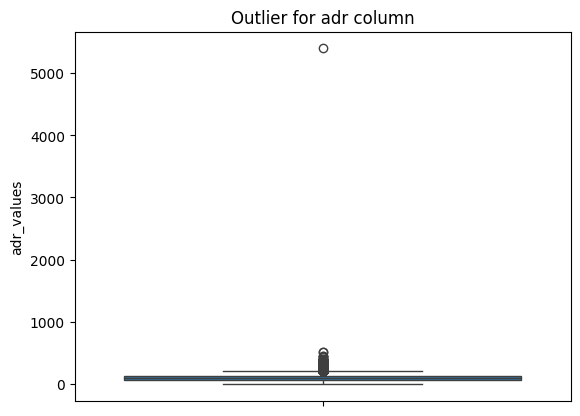

In [15]:
# first i have to check the box plot of adr because it outlier is very extreme so we will remove that outlier first
sns.boxplot(y = 'adr', data = df)
plt.ylabel('adr_values')
plt.title('Outlier for adr column')
plt.show()

**10) checking the 99 percentile value of all columns for removing the outliers in q99_list**

*We calculated q99 (99th percentile) to understand the range of each column, so we can remove all values beyond it as outliers. The describe() method only shows the 75th percentile and max value, which doesn’t clearly indicate how to handle outliers. That’s why we use q99 for outlier removal—it gives a stricter threshold.*

In [16]:
q99 = df.describe()
q99_list = []
for i in q99.columns:
  if i != 'reservation_status_date':              # skip this column
      q99_value = df[i].quantile(0.99)
      q99_list.append((i, q99_value))

q99_list

[('is_canceled', np.float64(1.0)),
 ('lead_time', np.float64(444.0)),
 ('arrival_date_year', np.float64(2017.0)),
 ('arrival_date_week_number', np.float64(53.0)),
 ('arrival_date_day_of_month', np.float64(31.0)),
 ('stays_in_weekend_nights', np.float64(4.0)),
 ('stays_in_week_nights', np.float64(10.0)),
 ('adults', np.float64(3.0)),
 ('children', np.float64(2.0)),
 ('babies', np.float64(0.0)),
 ('is_repeated_guest', np.float64(1.0)),
 ('previous_cancellations', np.float64(1.0)),
 ('previous_bookings_not_canceled', np.float64(3.0)),
 ('booking_changes', np.float64(3.0)),
 ('days_in_waiting_list', np.float64(75.0)),
 ('adr', np.float64(252.0)),
 ('required_car_parking_spaces', np.float64(1.0)),
 ('total_of_special_requests', np.float64(3.0))]

**11) now remove all outliers which are greater than max value of a particular column**

In [17]:
df = df[df['lead_time']<=444]
df = df[df['arrival_date_week_number']<=53]
df = df[df['stays_in_weekend_nights']<=4]
df = df[df['stays_in_week_nights']<=10]
df = df[df['adults']<=3]
df = df[df['children']<=2]
df = df[df['babies']<=0]
df = df[df['previous_cancellations']<=1]
df = df[df['previous_bookings_not_canceled']<=3]
df = df[df['booking_changes']<=3]
df = df[df['days_in_waiting_list']<=75]
df = df[df['adr']<=252]
df = df[df['required_car_parking_spaces']<=1]
df = df[df['total_of_special_requests']<=3]

*now check that outliers were removed from the data with their rows*

In [18]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,111759.000000,111759.000000,111759.000000,111759.000000,111759.000000,111759.000000,111759.000000,111759.000000,111759.000000,111759.0,111759.000000,111759.000000,111759.000000,111759.000000,111759.000000,111759.000000,111759.000000,111759.000000,111759
mean,0.370619,99.896796,2016.150592,27.093773,15.778139,0.916105,2.451463,1.856477,0.095545,0.0,0.024258,0.051191,0.029027,0.187314,0.911918,100.872771,0.058886,0.556367,2016-07-28 14:23:58.144579072
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-03 00:00:00
50%,0.000000,68.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-06 00:00:00
75%,1.000000,156.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,125.700000,0.000000,1.000000,2017-02-06 00:00:00
max,1.000000,444.000000,2017.000000,53.000000,31.000000,4.000000,10.000000,3.000000,2.000000,0.0,1.000000,1.000000,3.000000,3.000000,75.000000,252.000000,1.000000,3.000000,2017-09-14 00:00:00
std,0.482973,98.944644,0.709220,13.578597,8.775799,0.940933,1.706173,0.483037,0.377850,0.0,0.153848,0.220387,0.229256,0.509004,6.620692,44.435492,0.235412,0.761854,NaN


In [19]:
df.shape

(111759, 30)

**Now the Data is totally clean**

# Data Analysis and Visualization

**1) How many percent of hotel bookings were canceled and how many were not canceled? We will show this using a bar plot.**

In [20]:
cancelled_perc = df['is_canceled'].value_counts(normalize = True) 
# .value_counts() → Counts occurrences of each unique value in the column (0 for not canceled, 1 for canceled).
#  normalize=True → Converts counts into proportions (percentages in decimal form) instead of raw numbers.

cancelled_perc

is_canceled
0    0.629381
1    0.370619
Name: proportion, dtype: float64

*0 means False and 1 means True*

**Now we plot Bar by using countplot**

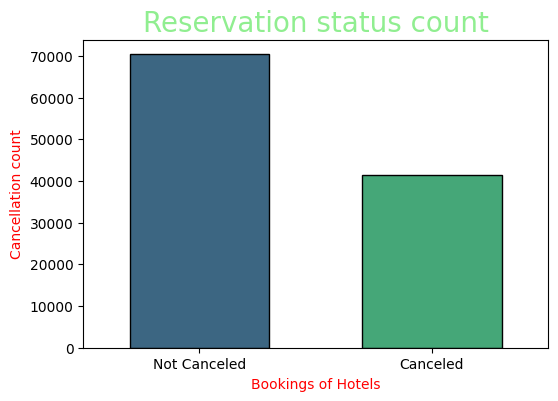

In [21]:
plt.figure(figsize = (6,4))
sns.countplot(x = 'is_canceled', data = df, edgecolor = 'k', width = 0.6, palette='viridis')
plt.xticks((0,1),(['Not Canceled', 'Canceled']))
plt.xlabel('Bookings of Hotels', c = 'red', size = 10)
plt.ylabel('Cancellation count', c = 'red', size = 10)
plt.title('Reservation status count', c = 'lightgreen', size = 20)
plt.show()

**2) Now, we will check on behalf of hotels which type of hotels have higher and lower cancellation rates.**

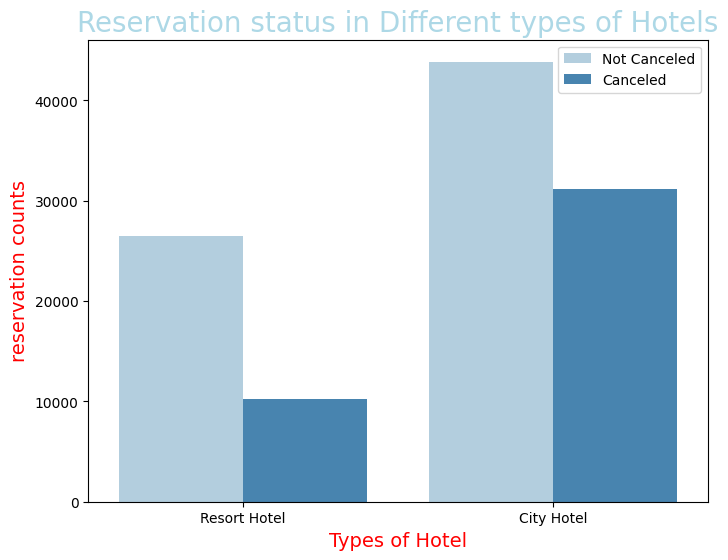

In [22]:
plt.figure(figsize = (8, 6))
sns.countplot(x = 'hotel', hue = 'is_canceled', data = df, palette= 'Blues')
plt.legend(labels = ['Not Canceled', 'Canceled'])
plt.xlabel('Types of Hotel', c = 'red', size = 14)
plt.ylabel('reservation counts', c = 'red', size = 14)
plt.title('Reservation status in Different types of Hotels', c = 'lightblue', size = 20)
plt.show()

*Now, we will analyze both hotels by normalization to see what percentage of reservations were canceled and what percentage were not canceled.*

In [23]:
resortHotel = df[df['hotel'] == 'Resort Hotel']
resortHotel['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.721845
1    0.278155
Name: proportion, dtype: float64

In [24]:
cityHotel = df[df['hotel'] == 'City Hotel']
cityHotel['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.584206
1    0.415794
Name: proportion, dtype: float64

***So, as we observed, city hotels have a much higher cancellation rate***

**3) Now we will examine how much effect price has on cancellations for city hotels versus resort hotels.**

*Now, we will group the reservation status dates of city hotels and resort hotels and calculate the mean of the 'ADR' (Average Daily Rate) column from the data.*

In [25]:
resort_hotel = resortHotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = cityHotel.groupby('reservation_status_date')[['adr']].mean()
resort_hotel

,adr
reservation_status_date,
2014-11-18,0.000000
2015-01-01,61.966667
2015-01-02,77.070000
2015-01-21,37.050000
2015-01-22,81.852500
...,...
2017-09-08,101.012500
2017-09-09,147.778333
2017-09-10,165.430000


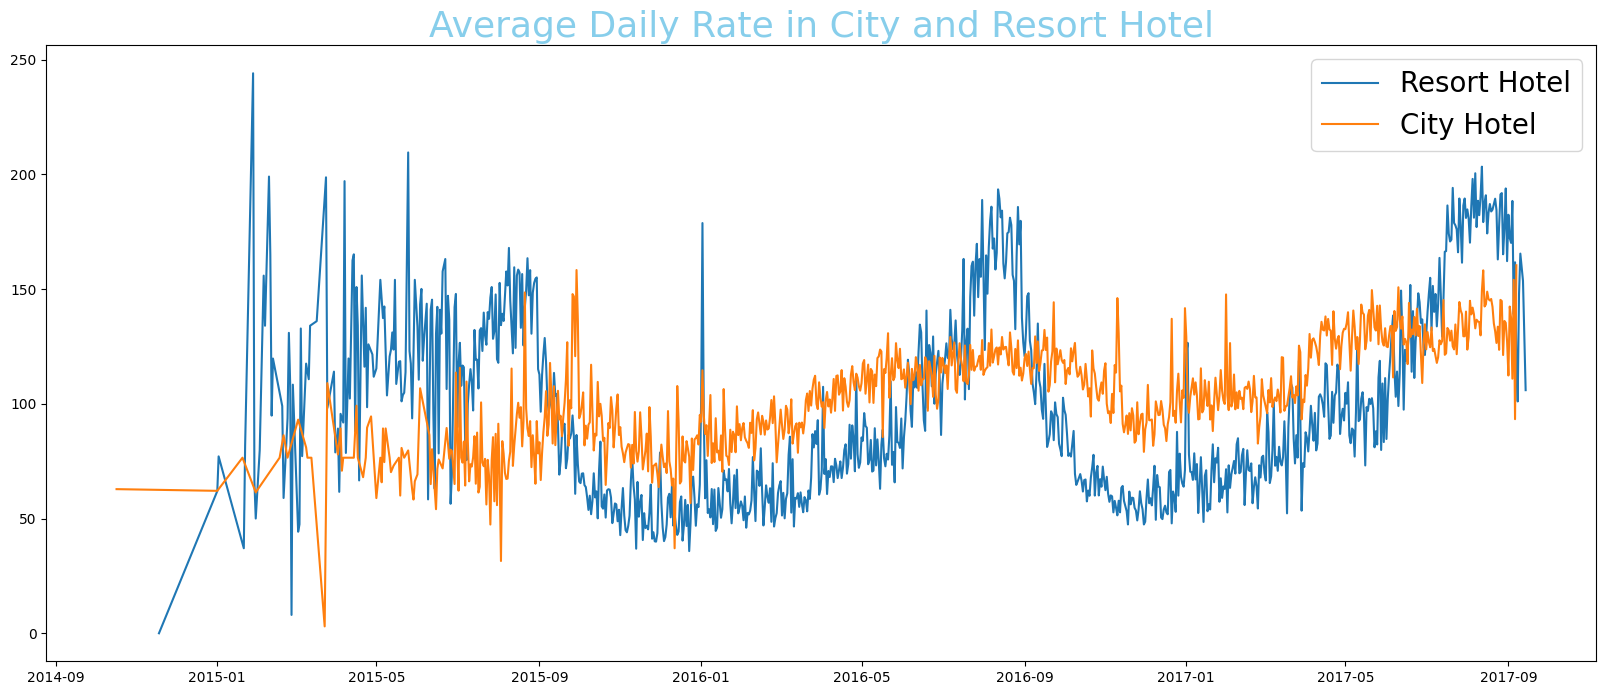

In [26]:
plt.figure(figsize = (20,8))
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label = 'City Hotel')
plt.title('Average Daily Rate in City and Resort Hotel', size = 26, c = 'skyblue')
plt.legend(fontsize = 20)
plt.show()

**This line plot shows that the price of city hotels is mostly lower than that of resort hotels.**

**4) Now we will check which months have the highest reservations and which months have the highest cancellations.**

*we dont have any column of month data so first we have to make it*

In [27]:
df['months'] = df['reservation_status_date'].dt.month
df['months'].head()

0    7
2    7
3    7
4    7
5    7
Name: months, dtype: int32

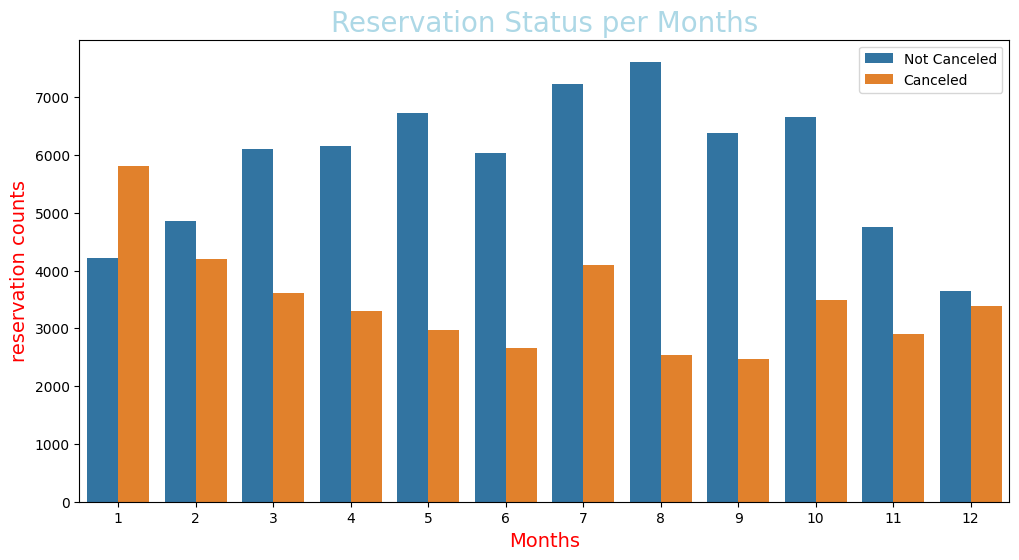

In [28]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'months', hue = 'is_canceled', data = df)
plt.legend(labels = ['Not Canceled', 'Canceled'], fontsize = 10)
plt.xlabel('Months', c = 'red', size = 14)
plt.ylabel('reservation counts', c = 'red', size = 14)
plt.title('Reservation Status per Months', c = 'lightblue', size = 20)
plt.show()

**As we can see, August has the highest number of reservations and the lowest cancellations, while January has the fewest reservations and the highest cancellations.**

**But why is this happening? Did hotel prices drop in August or rise in January? We need to check this now.**

*We only want data on canceled reservations.*

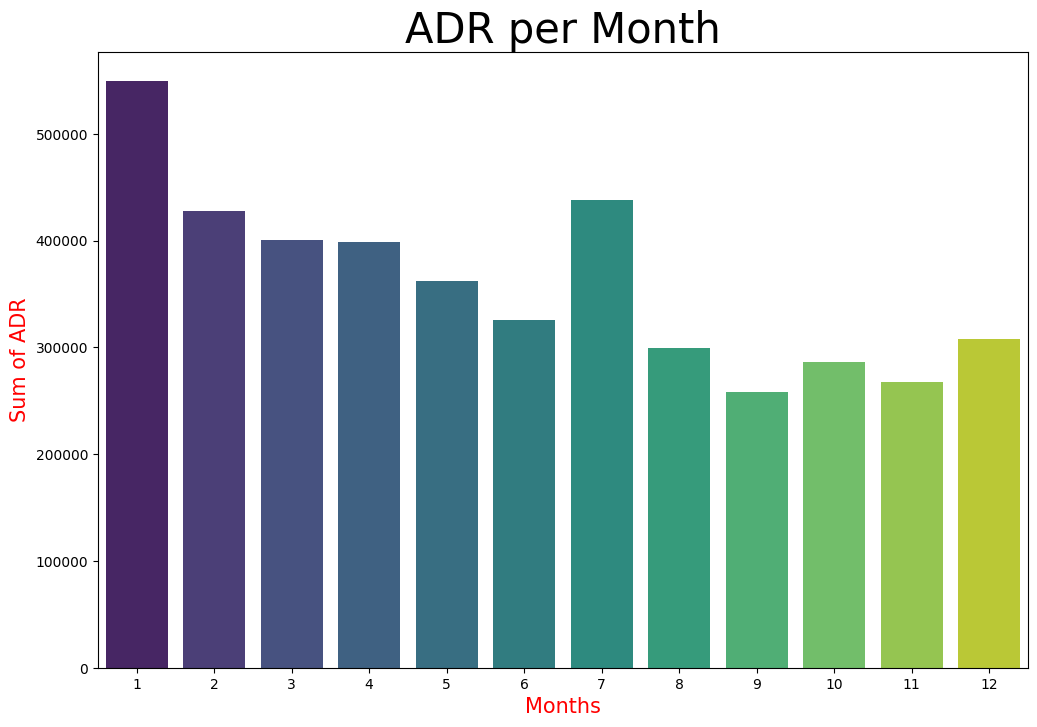

In [29]:
plt.figure(figsize = (12,8))
sns.barplot(x = 'months', y = 'adr', data = df[df['is_canceled'] == 1].groupby('months')[['adr']].sum().reset_index(), palette='viridis')
plt.title('ADR per Month', size = 30)
plt.ylabel('Sum of ADR', c = 'red', size = 15)
plt.xlabel('Months', c = 'red', size = 15)
plt.show()

**This plot also proves that January has the highest cancellations because prices are at their peak, while August-September see fewer cancellations due to the lowest price ranges.**

**5) Now we will analyze cancellation rates based on countries.**

*so we check only top 10 countries because in our dataset includes a total of 177 countries.*

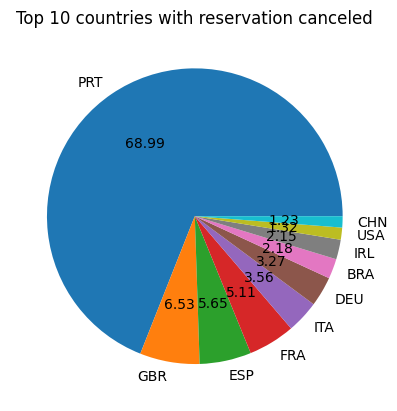

In [30]:
canceled_data = df[df['is_canceled'] == 1]
top_10_country = canceled_data['country'].value_counts()[:10]
plt.title('Top 10 countries with reservation canceled')
plt.pie(top_10_country, autopct = '%.2f', labels = top_10_country.index)
plt.show()

**As we can see from the pie chart, Portugal has the highest number of cancellations.**

**Suggestion :- *Based on this observation, we can suggest that hotels in Portugal should improve their facilities and reduce their price range.***

**6) Now we will check whether clients are coming through online or offline bookings.**

*We also hypothesized that most bookings are made through offline agents, where even the hotels have to pay commissions to these agents.*

In [31]:
# now we use .value_counts for checking their total bookings in which mode
df['market_segment'].value_counts()

market_segment
Online TA        54352
Offline TA/TO    22785
Groups           18067
Direct           11465
Corporate         4292
Complementary      584
Aviation           214
Name: count, dtype: int64

In [32]:
# now check the normalize count
df['market_segment'].value_counts(normalize = True)

market_segment
Online TA        0.486332
Offline TA/TO    0.203876
Groups           0.161660
Direct           0.102587
Corporate        0.038404
Complementary    0.005226
Aviation         0.001915
Name: proportion, dtype: float64

**Now we’ve realized that offline agents aren’t attracting as many customers as online bookings, which means our hypothesis was incorrect.**

*Therefore, instead of spending money on offline agents, hotels should invest more in online platforms. This way, whenever people search for hotels, our properties will appear as top suggestions. After all, this is the digital age - most travelers now book hotels online.*

**7) now we check the same percent count on the basis of cancellation reservation**

In [33]:
# we make dataframe of cancel reservation so we use that dataframe here
canceled_data['market_segment'].value_counts(normalize = True)

market_segment
Online TA        0.482834
Groups           0.265789
Offline TA/TO    0.183969
Direct           0.042250
Corporate        0.022139
Complementary    0.001907
Aviation         0.001111
Name: proportion, dtype: float64

**So we're seeing that while most bookings happen online, cancellations are also significantly higher through online channels compared to offline.**

**Problem :-**
*This is happening because when people see hotel rooms online, the photos show beautiful, clean rooms with great facilities. But when they arrive, the actual room often doesn't match what was advertised online. This disappointment leads many guests to get frustrated and cancel their bookings.*

**Conclusion :-**
*To fix this, hotels should 
Show rooms exactly as they are in online photos – no misleading edits.
Actually upgrade room facilities to match guest expectations.*

# Suggestions



1. Cancellation rates rise as the price does. In order to prevent cancellations of reservations, hotels could work on their pricing stratigies and try to lower the rates for specific hotels based on loactions. They can also provide some discounts to the consumers.
2. As the ratio of cancellation and not cancellation of the resort hotel is higher than the city hotels. So the hotels should provide a reasonable discount on the room prices on weekends or on holidays.
3. In the month of january, hotels can start campaigns or marketing with a reasonable amount to increase their revenue as the cancellations is the highest in this month.
4. They can also increase the quality of their hotels and their services mainly in Portugal to reduce the cancellation rate.

